In [69]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [70]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [71]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [72]:
pip install six

Note: you may need to restart the kernel to use updated packages.


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn import preprocessing
from sklearn import metrics
from functools import partial
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn.svm import OneClassSVM
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [11]:
col_names = ['Age','JOB_admin.','JOB_blue-collar','JOB_entrepreneur','JOB_housemaid','JOB_management','JOB_retired','JOB_self-employed',
                'JOB_services','JOB_student','JOB_technician','JOB_unemployed','JOB_unknown','Marital_divorced','Marital_married','Marital_single',
                'Marital_unknown','Education_basic.4y','Education_basic.6y','Education_basic.9y','Education_high.school','Education_illiterate',
                'Education_professional.course','Education_university.degree','Education_unknown','Creditviolation_no','Creditviolation_unknown',
                'Creditviolation_yes','Mortgage_no','Mortgage_unknown','Mortgage_yes','Loan_no','Loan_unknown','Loan_yes','Contact',
                'Month_CPI_CCI_1','Month_CPI_CCI_2','Month_CPI_CCI_3','Month_CPI_CCI_4','Month_CPI_CCI_5','Month_CPI_CCI_6','Month_CPI_CCI_7',
                'Month_CPI_CCI_8','Month_CPI_CCI_9','Month_CPI_CCI_10','Month_CPI_CCI_11','Month_CPI_CCI_12','Month_CPI_CCI_13',
                'Month_CPI_CCI_14','Month_CPI_CCI_15','Month_CPI_CCI_16','Month_CPI_CCI_17','Month_CPI_CCI_18','Month_CPI_CCI_19',
                'Month_CPI_CCI_20','Month_CPI_CCI_21','Month_CPI_CCI_22','Month_CPI_CCI_23','Month_CPI_CCI_24','Month_CPI_CCI_25',
                'Month_CPI_CCI_26','DOW_mon','DOW_tue','DOW_wed','DOW_thu','DOW_fri','Duration','Campaign','Pdays_0','Pdays_1','Pdays_2',
                'Pdays_3','Pdays_4','Pdays_5','Pdays_6','Pdays_7','Pdays_8','Pdays_9','Pdays_10','Pdays_11','Pdays_12','Pdays_13','Pdays_14',
                'Pdays_15','Pdays_16','Pdays_17','Pdays_18','Pdays_19','Pdays_20','Pdays_21','Pdays_22','Pdays_25','Pdays_26','Pdays_27',
                'Pdays_999','Previous','Poutcome_failure','Poutcome_nonexistent','Poutcome_success','EVR','NE','Subscription','Y']
# load datasetSex
data = pd.read_csv("Bank_Normalization_New-v3.csv", header=None, names=col_names)

In [12]:
data.head()

,Age,JOB_admin.,JOB_blue-collar,JOB_entrepreneur,JOB_housemaid,JOB_management,JOB_retired,JOB_self-employed,JOB_services,JOB_student,...,Pdays_27,Pdays_999,Previous,Poutcome_failure,Poutcome_nonexistent,Poutcome_success,EVR,NE,Subscription,Y
0,0.271605,0,0,0,0,0,0,1,0,0,...,0,1,0.0,0,1,0,0.9375,0.859735,0,4.857
1,0.469136,0,0,0,0,0,0,0,0,0,...,0,1,0.0,0,1,0,0.9375,0.859735,0,4.857
2,0.395062,0,0,1,0,0,0,0,0,0,...,0,1,0.0,0,1,0,0.9375,0.859735,1,4.857
3,0.506173,0,0,0,0,0,0,0,0,0,...,0,1,0.0,0,1,0,0.9375,0.859735,0,4.857
4,0.345679,0,1,0,0,0,0,0,0,0,...,0,1,0.0,0,1,0,0.9375,0.859735,1,4.857


In [13]:
from tkinter import Y
feature_cols = ['Age','JOB_admin.','JOB_blue-collar','JOB_entrepreneur','JOB_housemaid','JOB_management','JOB_retired','JOB_self-employed',
                'JOB_services','JOB_student','JOB_technician','JOB_unemployed','JOB_unknown','Marital_divorced','Marital_married','Marital_single',
                'Marital_unknown','Education_basic.4y','Education_basic.6y','Education_basic.9y','Education_high.school','Education_illiterate',
                'Education_professional.course','Education_university.degree','Education_unknown','Creditviolation_no','Creditviolation_unknown',
                'Creditviolation_yes','Mortgage_no','Mortgage_unknown','Mortgage_yes','Loan_no','Loan_unknown','Loan_yes','Contact',
                'Month_CPI_CCI_1','Month_CPI_CCI_2','Month_CPI_CCI_3','Month_CPI_CCI_4','Month_CPI_CCI_5','Month_CPI_CCI_6','Month_CPI_CCI_7',
                'Month_CPI_CCI_8','Month_CPI_CCI_9','Month_CPI_CCI_10','Month_CPI_CCI_11','Month_CPI_CCI_12','Month_CPI_CCI_13',
                'Month_CPI_CCI_14','Month_CPI_CCI_15','Month_CPI_CCI_16','Month_CPI_CCI_17','Month_CPI_CCI_18','Month_CPI_CCI_19',
                'Month_CPI_CCI_20','Month_CPI_CCI_21','Month_CPI_CCI_22','Month_CPI_CCI_23','Month_CPI_CCI_24','Month_CPI_CCI_25',
                'Month_CPI_CCI_26','DOW_mon','DOW_tue','DOW_wed','DOW_thu','DOW_fri','Duration','Campaign','Pdays_0','Pdays_1','Pdays_2',
                'Pdays_3','Pdays_4','Pdays_5','Pdays_6','Pdays_7','Pdays_8','Pdays_9','Pdays_10','Pdays_11','Pdays_12','Pdays_13','Pdays_14',
                'Pdays_15','Pdays_16','Pdays_17','Pdays_18','Pdays_19','Pdays_20','Pdays_21','Pdays_22','Pdays_25','Pdays_26','Pdays_27',
                'Pdays_999','Previous','Poutcome_failure','Poutcome_nonexistent','Poutcome_success','EVR','NE','Subscription']
X = data[feature_cols] # Features
y = data.Y # Target variable
y

0        4.857
1        4.857
2        4.857
3        4.857
4        4.857
         ...  
41183    1.028
41184    1.028
41185    1.028
41186    1.028
41187    1.028
Name: Y, Length: 41188, dtype: float64

In [14]:
data2 = preprocessing.normalize(data, norm= 'l2')
scaler = MinMaxScaler()
data3 = scaler.fit(data)
data3 = scaler.transform(data)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [16]:
X_train.shape

(28831, 102)

In [8]:
clf=svm.SVR(C=2, kernel='linear')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_train)
y_pred

array([4.90527411, 4.88194624, 4.16127929, ..., 4.83682621, 4.95700201,
       1.30039833])

In [9]:
print(clf.score(X_train,y_train))
print(clf.score(X_test, y_test))

0.9993100533534547
0.9992884069380691


In [40]:
clf = svm.SVC(kernel='rbf', C=1e3, gamma='auto')
clf.fit(X_train, y_train)
y_pred_svr=clf.predict(X_test)
print("MAE:",mean_absolute_error(y_test,y_pred_svr))
print("RMSE : %.4g" % mean_squared_error(y_test, y_pred_svr,squared=False))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred_svr))

ValueError: Unknown label type: 'continuous'

In [17]:
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
regr = make_pipeline(StandardScaler(), LinearSVR(random_state=0, tol=1e-5))
regr.fit(X_train, y_train)
y_pred_lsvr = regr.predict(X_test)
print("MAE:",mean_absolute_error(y_test,y_pred_lsvr))
print("RMSE : %.4g" % mean_squared_error(y_test, y_pred_lsvr,squared=False))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred_lsvr))

MAE: 0.021378888372260187
RMSE : 0.03994
MAPE: 0.010391008461660791


c:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [46]:
# 建立 kernel='linear' 模型
linearModel=svm.SVR(C=2, kernel='linear')
# 使用訓練資料訓練模型
linearModel.fit(X, y)
# 使用訓練資料預測分類
predicted=linearModel.predict(X_test)
y_pred = regr.predict(X_test)
print("MAE:",mean_absolute_error(y_test,y_pred))
print("RMSE : %.4g" % mean_squared_error(y_test, y_pred,squared=False))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred))

MAE: 0.021378888372260187
RMSE : 0.03994
MAPE: 0.010391008461660791


In [23]:
# 建立 kernel='poly' 模型
polyModel=svm.SVR(C=6, kernel='poly', degree=3, gamma='auto')
# 使用訓練資料訓練模型
polyModel.fit(X, y)
# 使用訓練資料預測分類
predicted=polyModel.predict(X_test)
y_pred_lsvr = regr.predict(X_test)
print("MAE:",mean_absolute_error(y_test,y_pred_svr))
print("RMSE : %.4g" % mean_squared_error(y_test, y_pred_svr,squared=False))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred_svr))

NameError: name 'y_pred_svr' is not defined

score_array [0.9992998740402562, 0.9993100533534547, 0.9993115108027655, 0.9993127254314228, 0.9993089340969409, 0.9993128169799963, 0.9993168154651705, 0.999315090052971, 0.9993150020906288, 0.9993156478559918, 0.9993114839183891, 0.9993107822383387, 0.9993135533694584, 0.9993138533684405, 0.9993160961563531, 0.9993123858173263, 0.9993136171325863, 0.9993127822772714, 0.9993131137404048]
 
score_array_MAX: 0.9993168154651705
----------------------------------------------------------------------------------------------------------
score_array_test [0.999278069810918, 0.9992884069380691, 0.9992901405744706, 0.9992911662769876, 0.9992873359600054, 0.9992912266053589, 0.9992955105867617, 0.9992937222455118, 0.9992936283517933, 0.999294369588311, 0.9992899710014005, 0.9992892317029914, 0.9992923137240981, 0.9992925043872907, 0.9992946535977804, 0.9992907698847877, 0.9992921356838173, 0.9992913489117561, 0.9992917797890105]
 
score_array_test_MAX: 0.9992955105867617


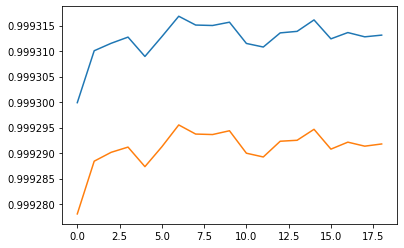

In [55]:
score_array= []
score_array_test= []
for i in range(1,20):   
    y_pred_svr = svm.SVR(kernel='linear',C=i)
    y_pred_svr.fit(X_train, y_train)
    score_val = y_pred_svr.score(X_train, y_train)
    score_test = y_pred_svr.score(X_test, y_test)
    score_array.append(score_val)
    score_array_test.append(score_test)

print("score_array",score_array)
print(" ")
print("score_array_MAX:", np.max(score_array))
print("----------------------------------------------------------------------------------------------------------")
print("score_array_test", score_array_test)
print(" ")
print("score_array_test_MAX:", np.max(score_array_test))
plt.plot(score_array)
plt.plot(score_array_test)